<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/Tema5_csvCC_GENERAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Celda 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [3]:
# Celda 2: Cargar el dataset
df = pd.read_csv('sample_data/CC_GENERAL.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Celda 3: Explorar información del dataset
print(f"Shape del dataset: {df.shape}")
print(f"\nInformación del dataset:")
df.info()
print(f"\nPrimeras estadísticas:")
df.describe()


Shape del dataset: (8950, 18)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Celda 4: Preprocesamiento - Análisis de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nTotal de filas con nulos: {df.isnull().any(axis=1).sum()}")


Valores nulos por columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Total de filas con nulos: 314


In [6]:
# Celda 5: Preprocesamiento - Imputar valores nulos
# Imputamos los valores nulos con la mediana de cada columna
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0 and col != 'CUST_ID':
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Valores nulos después de imputar:")
print(df_clean.isnull().sum())


Valores nulos después de imputar:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


/tmp/ipython-input-1643853047.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [7]:
#Celda 6: Preprocesamiento - Filas duplicadas
print(f"Filas duplicadas: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Shape después de eliminar duplicados: {df_clean.shape}")


Filas duplicadas: 0
Shape después de eliminar duplicados: (8950, 18)


In [8]:
# Celda 7: Preprocesamiento - Eliminar columna CUST_ID
# Guardamos CUST_ID por separado y eliminamos del dataset
cust_ids = df_clean['CUST_ID']
df_clean = df_clean.drop('CUST_ID', axis=1)
print(f"Columnas después de eliminar CUST_ID:")
print(df_clean.columns.tolist())
print(f"\nShape: {df_clean.shape}")


Columnas después de eliminar CUST_ID:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Shape: (8950, 17)


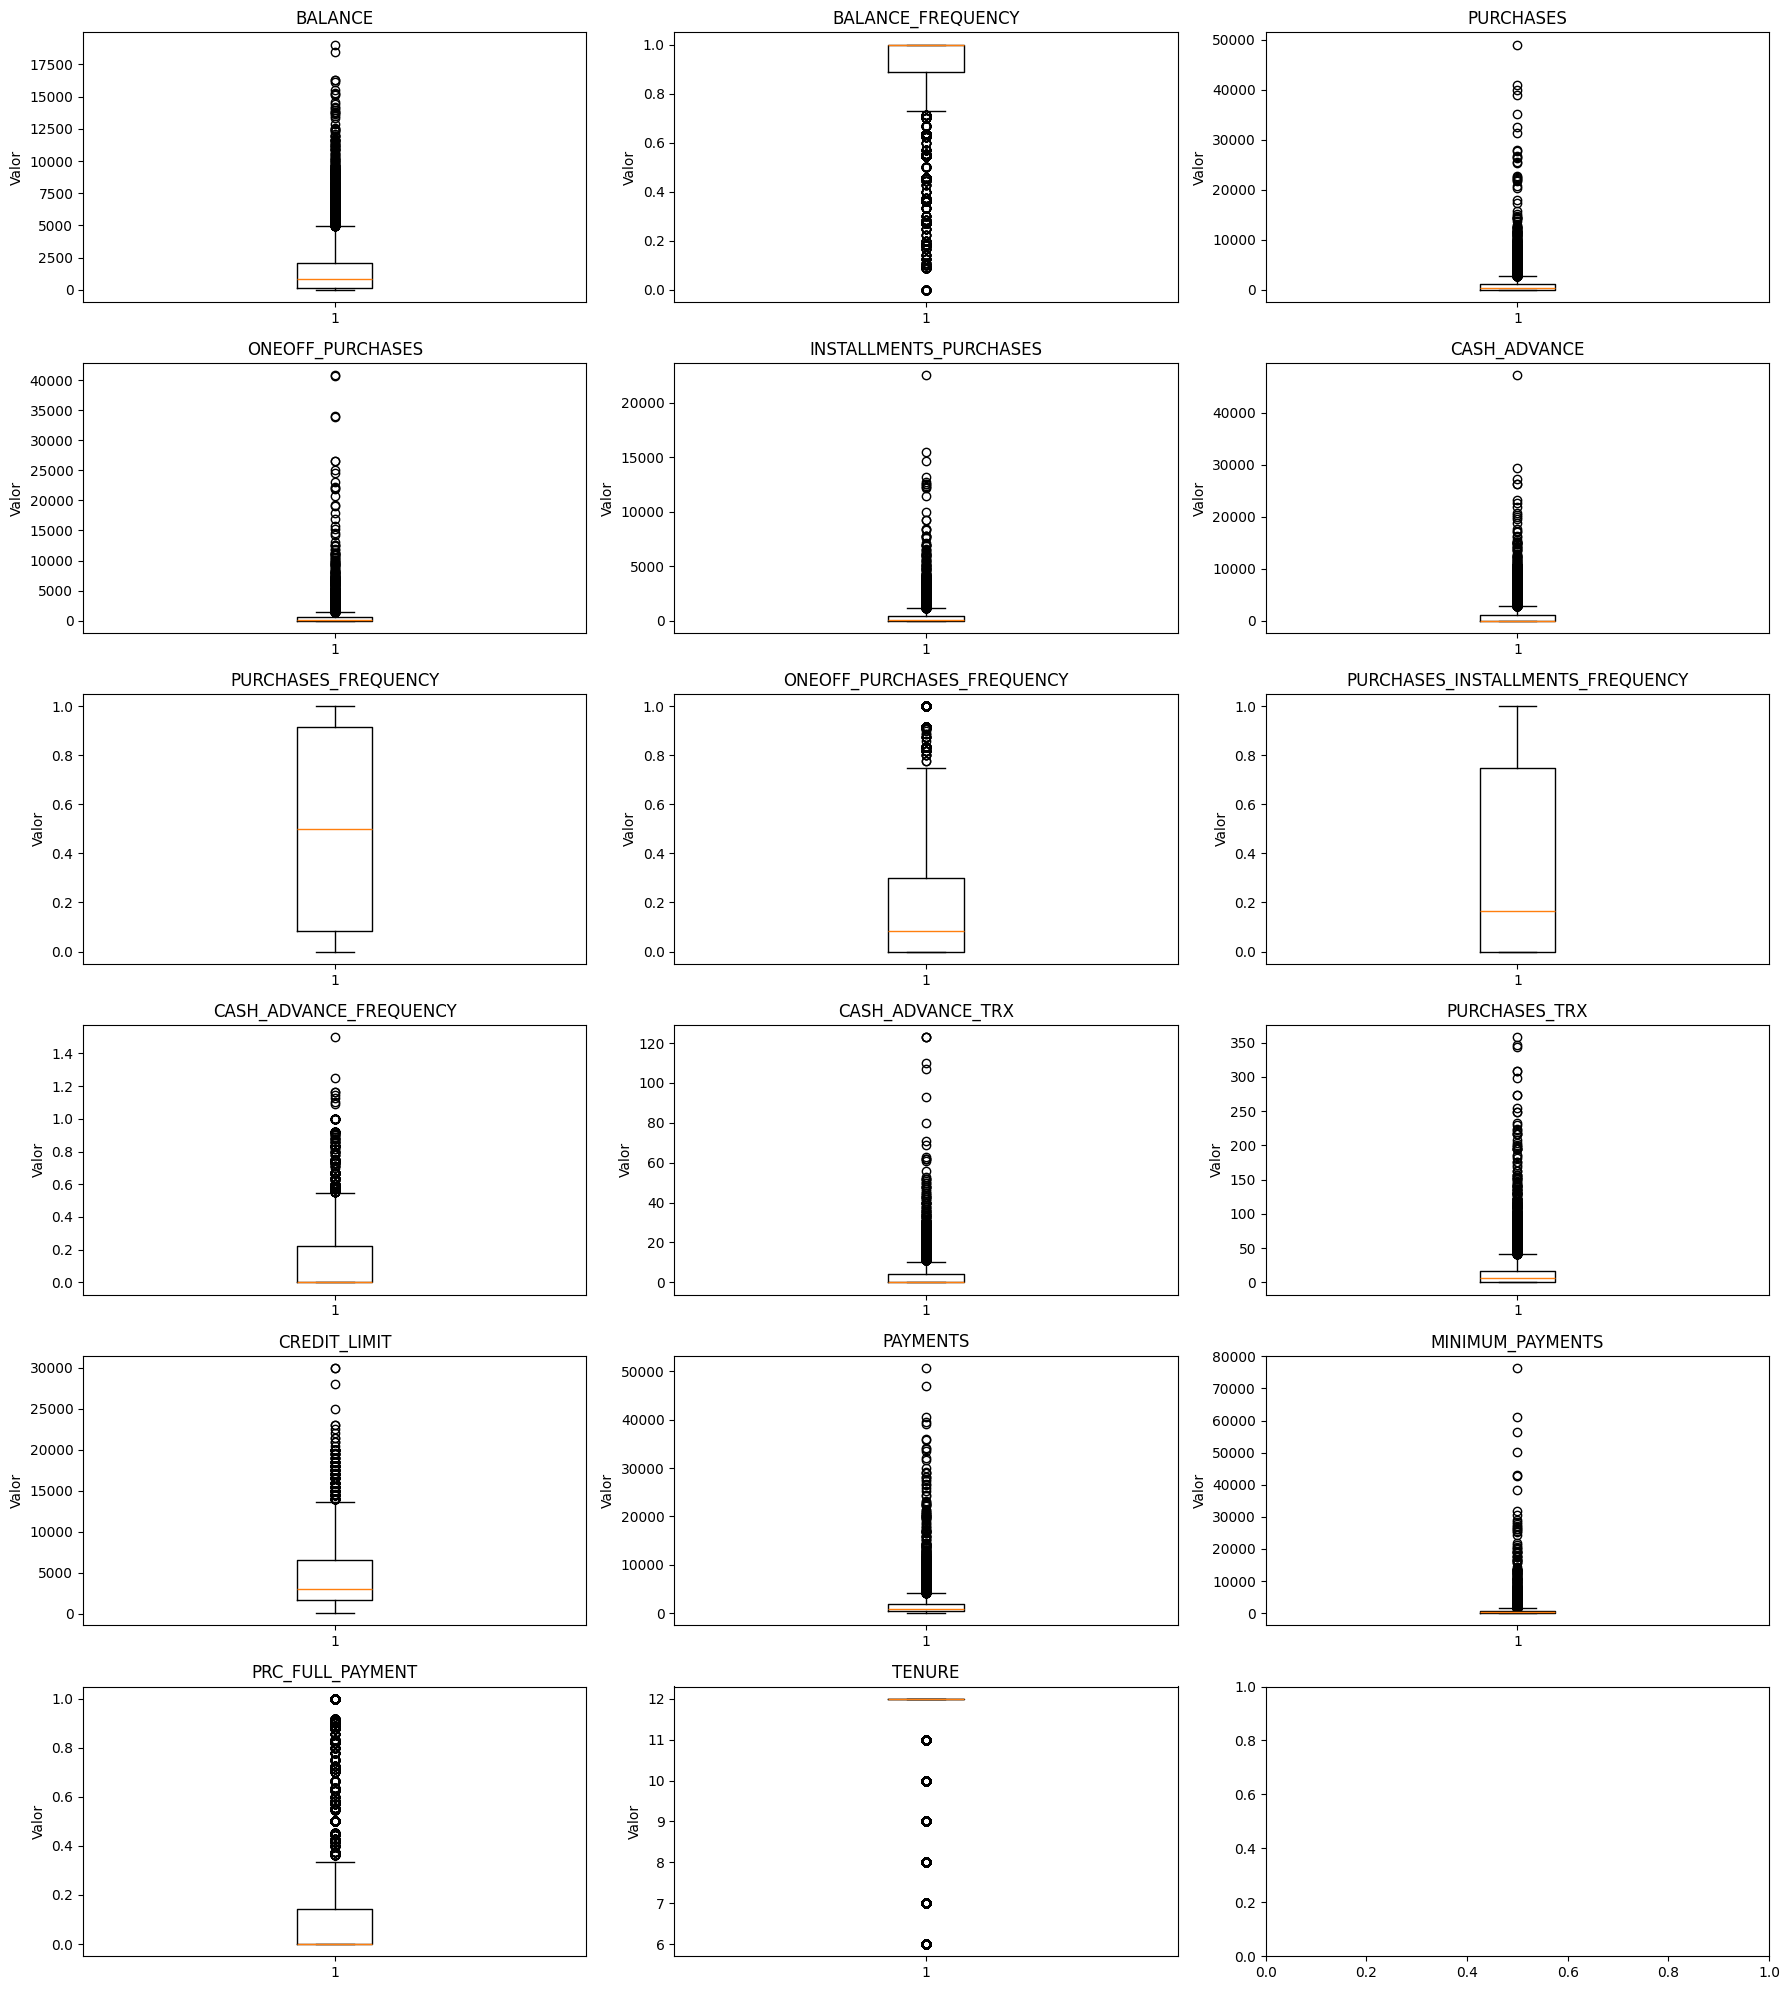

In [9]:
# Celda 8: Preprocesamiento - Detección de outliers (visualización)
# Visualizamos boxplots para detectar outliers
fig, axes = plt.subplots(6, 3, figsize=(18, 20))
axes = axes.ravel()

for idx, col in enumerate(df_clean.columns):
    axes[idx].boxplot(df_clean[col].dropna())
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Valor')

plt.tight_layout()
plt.show()


In [12]:
#Celda 9: Estandarizar los datos con MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clean)
print("Datos escalados (primeras 5)")
print(df_scaled[:5])
print(f"\nShape de df_scaled: {df_scaled.shape}")

Datos escalados (primeras 5)
[[2.14779454e-03 8.18182000e-01 1.94536779e-03 0.00000000e+00
  4.24000000e-03 0.00000000e+00 1.66667000e-01 0.00000000e+00
  8.33330000e-02 0.00000000e+00 0.00000000e+00 5.58659218e-03
  3.17195326e-02 3.97863135e-03 1.82564563e-03 0.00000000e+00
  1.00000000e+00]
 [1.68169097e-01 9.09091000e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.36684909e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.66666667e-01 3.25203252e-02 0.00000000e+00
  2.32053422e-01 8.08933873e-02 1.40344791e-02 2.22222000e-01
  1.00000000e+00]
 [1.31026136e-01 1.00000000e+00 1.57662475e-02 1.89682603e-02
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.35195531e-02
  2.48747913e-01 1.22643641e-02 8.20961806e-03 0.00000000e+00
  1.00000000e+00]
 [8.75207906e-02 6.36364000e-01 3.05671522e-02 3.67751234e-02
  0.00000000e+00 4.36572316e-03 8.33330000e-02 8.33330000e-02
  0.00000000e+00 5.55553333e-02 8.13008130e-03 2.

/tmp/ipython-input-778784913.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(k_values, wcss_before, 'bx-', marker='o')


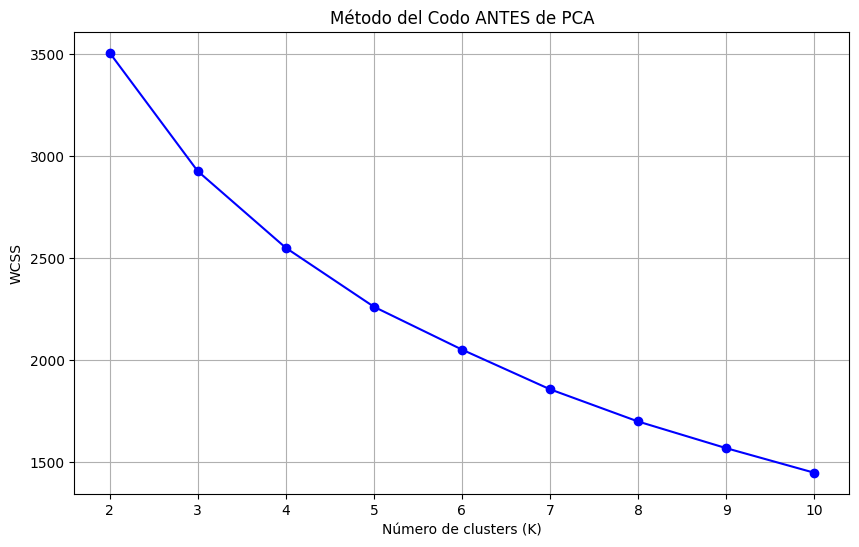

In [14]:
#Celda 10: Método del codo (ANTES de PCA)
wcss_before = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
        max_iter=300
    )
    kmeans.fit(df_scaled)
    wcss_before.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_before, 'bx-', marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WCSS')
plt.title('Método del Codo ANTES de PCA')
plt.grid(True)
plt.show()


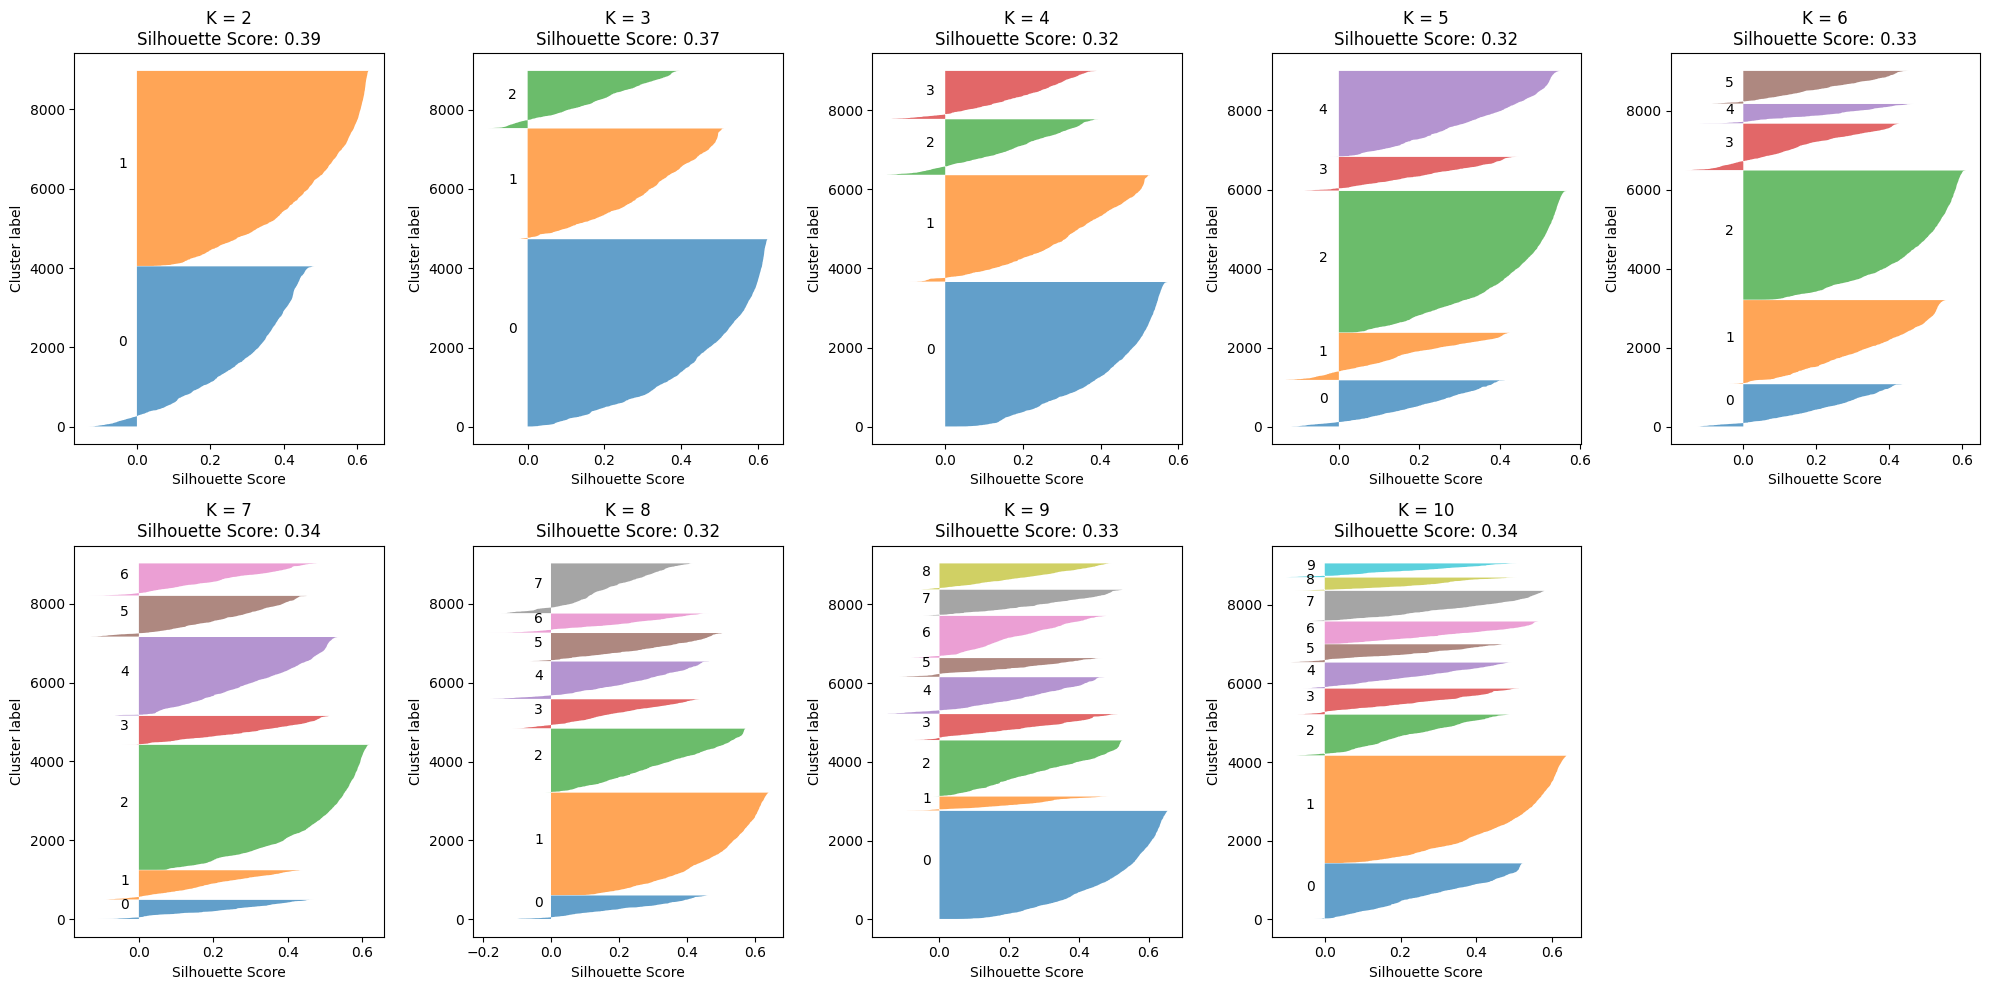


Silhouette Scores ANTES de PCA:
K=2: Silhouette Score = 0.3867
K=3: Silhouette Score = 0.3724
K=4: Silhouette Score = 0.3215
K=5: Silhouette Score = 0.3191
K=6: Silhouette Score = 0.3342
K=7: Silhouette Score = 0.3374
K=8: Silhouette Score = 0.3165
K=9: Silhouette Score = 0.3342
K=10: Silhouette Score = 0.3420


In [24]:
#Celda 11: Método de la silueta (ANTES de PCA)
from sklearn.metrics import silhouette_score, silhouette_samples

# Lista de valores de K a probar
k_values = range(2, 11)

# Inicializar la figura
plt.figure(figsize=(20, 10))

# Calcular y graficar la métrica de silueta para diferentes valores de K
silhouette_scores_before = []
for i, k in enumerate(k_values, start=1):
    # Crear el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)

    # Predecir las etiquetas del clúster
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Calcular la métrica de silueta
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores_before.append(silhouette_avg)

    # Graficar la métrica de silueta para este valor de K
    plt.subplot(2, 5, i)
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for j in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f'K = {k}\nSilhouette Score: {silhouette_avg:.2f}')
    plt.xlabel('Silhouette Score')
    plt.ylabel('Cluster label')

plt.tight_layout()
plt.show()

# Mostrar scores
print("\nSilhouette Scores ANTES de PCA:")
for k, score in zip(k_values, silhouette_scores_before):
    print(f"K={k}: Silhouette Score = {score:.4f}")



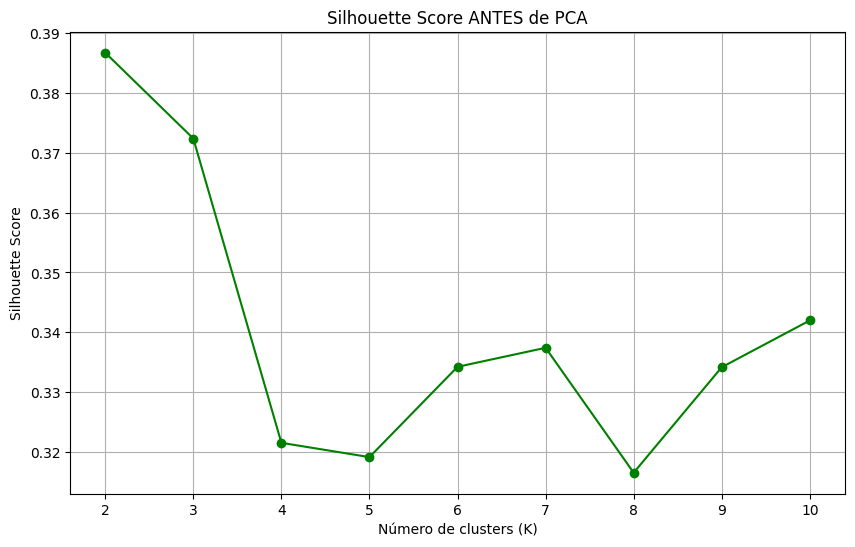


Mejor K según silueta ANTES de PCA: 2
Score: 0.3867

💡 Según el método del codo y la silueta, K=3 parece ser una buena elección


In [25]:
# Celda 12: Analisis del K optimo Antes de PCA
# Gráfico de línea del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores_before, 'go-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score ANTES de PCA')
plt.grid(True)
plt.show()

# Determinar mejor K
best_k_before = k_values[np.argmax(silhouette_scores_before)]
print(f"\nMejor K según silueta ANTES de PCA: {best_k_before}")
print(f"Score: {max(silhouette_scores_before):.4f}")
print("\n💡 Según el método del codo y la silueta, K=3 parece ser una buena elección")


In [26]:
#Celda 13: Aplicar PCA sin especificar componentes
pca = PCA()
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print(f"Varianza explicada por cada componente (primeros 10):")
for i, var in enumerate(explained_variance[:10], 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")

print(f"\nVarianza acumulada (primeros 10):")
for i, var in enumerate(cumulative_variance[:10], 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")


Varianza explicada por cada componente (primeros 10):
  PC1: 0.4960 (49.60%)
  PC2: 0.1405 (14.05%)
  PC3: 0.1284 (12.84%)
  PC4: 0.0768 (7.68%)
  PC5: 0.0696 (6.96%)
  PC6: 0.0359 (3.59%)
  PC7: 0.0182 (1.82%)
  PC8: 0.0135 (1.35%)
  PC9: 0.0066 (0.66%)
  PC10: 0.0055 (0.55%)

Varianza acumulada (primeros 10):
  PC1: 0.4960 (49.60%)
  PC2: 0.6365 (63.65%)
  PC3: 0.7650 (76.50%)
  PC4: 0.8417 (84.17%)
  PC5: 0.9114 (91.14%)
  PC6: 0.9472 (94.72%)
  PC7: 0.9654 (96.54%)
  PC8: 0.9790 (97.90%)
  PC9: 0.9855 (98.55%)
  PC10: 0.9910 (99.10%)


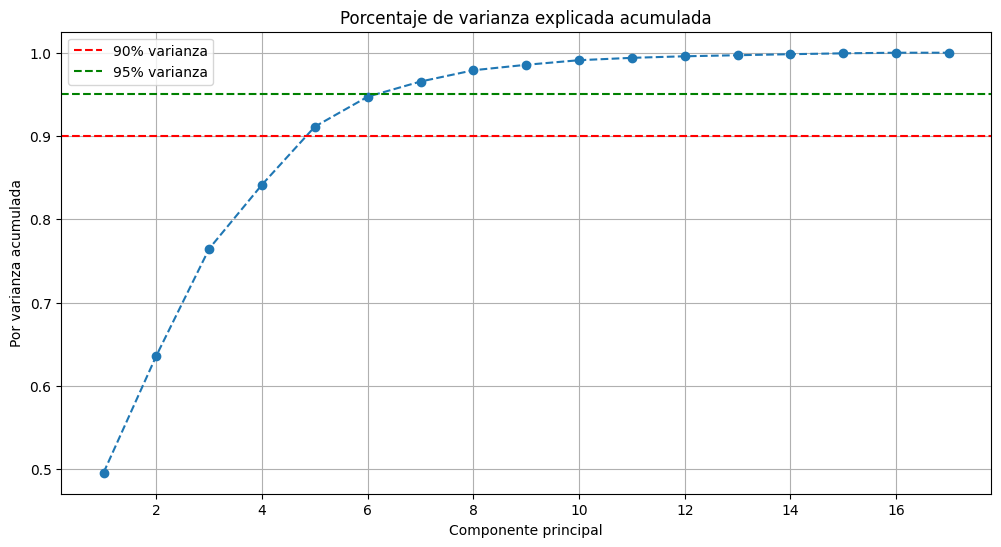


Número de componentes para 90% varianza: 5
Varianza acumulada con 5 componentes: 0.9114 (91.14%)

Número de componentes para 95% varianza: 7
Varianza acumulada con 7 componentes: 0.9654 (96.54%)


In [27]:
# Celda 14: Visualizar varianza explicada acumulada
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Porcentaje de varianza explicada acumulada')
plt.xlabel('Componente principal')
plt.ylabel('Por varianza acumulada')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% varianza')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% varianza')
plt.legend()
plt.show()

# Determinar número de componentes para 90% varianza
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nNúmero de componentes para 90% varianza: {n_components_90}")
print(f"Varianza acumulada con {n_components_90} componentes: {cumulative_variance[n_components_90-1]:.4f} ({cumulative_variance[n_components_90-1]*100:.2f}%)")

# También mostramos para 95%
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNúmero de componentes para 95% varianza: {n_components_95}")
print(f"Varianza acumulada con {n_components_95} componentes: {cumulative_variance[n_components_95-1]:.4f} ({cumulative_variance[n_components_95-1]*100:.2f}%)")


In [29]:
#Celda 15 (ajustada): Aplicar PCA con n componentes
# Usamos 5 componentes que explican el 91.14% de la varianza (>90%)
pca_final = PCA(n_components=n_components_90)
X_pca = pca_final.fit_transform(df_scaled)

print(f"Reducción de dimensionalidad:")
print(f"  • Shape original: {df_scaled.shape} ({df_scaled.shape[1]} dimensiones)")
print(f"  • Shape después de PCA: {X_pca.shape} ({X_pca.shape[1]} dimensiones)")
print(f"  • Reducción: {df_scaled.shape[1] - X_pca.shape[1]} dimensiones eliminadas")
print(f"\nVarianza explicada:")
print(f"  • Varianza total capturada: {pca_final.explained_variance_ratio_.sum():.4f} ({pca_final.explained_variance_ratio_.sum()*100:.2f}%)")
print(f"  • Información perdida: {(1 - pca_final.explained_variance_ratio_.sum())*100:.2f}%")

print(f"\nDesglose por componente:")
for i, var in enumerate(pca_final.explained_variance_ratio_, 1):
    print(f"  • PC{i}: {var:.4f} ({var*100:.2f}%)")

Reducción de dimensionalidad:
  • Shape original: (8950, 17) (17 dimensiones)
  • Shape después de PCA: (8950, 5) (5 dimensiones)
  • Reducción: 12 dimensiones eliminadas

Varianza explicada:
  • Varianza total capturada: 0.9114 (91.14%)
  • Información perdida: 8.86%

Desglose por componente:
  • PC1: 0.4960 (49.60%)
  • PC2: 0.1405 (14.05%)
  • PC3: 0.1284 (12.84%)
  • PC4: 0.0768 (7.68%)
  • PC5: 0.0696 (6.96%)


/tmp/ipython-input-2761749502.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(k_values, wcss_after, 'bx-', marker='o')


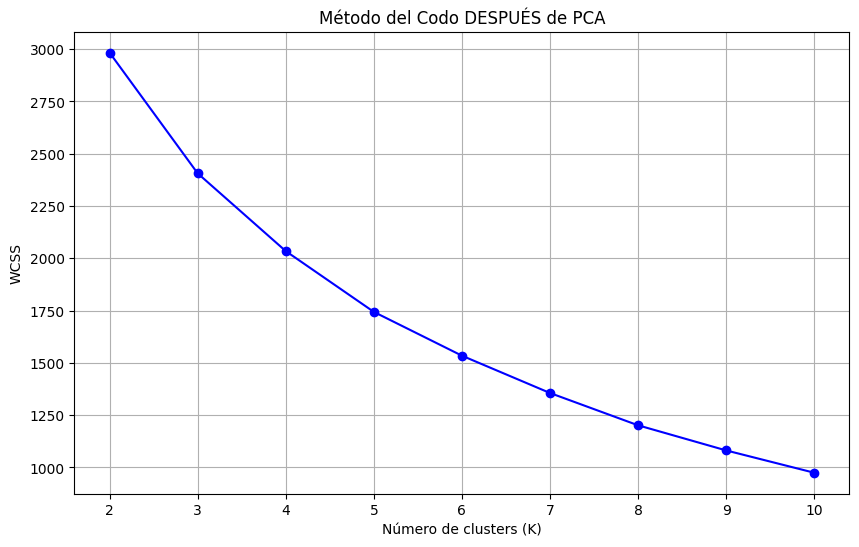

In [30]:
# Celda 16: Método del codo (DESPUÉS de PCA)
wcss_after = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
        max_iter=300
    )
    kmeans.fit(X_pca)
    wcss_after.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_after, 'bx-', marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WCSS')
plt.title('Método del Codo DESPUÉS de PCA')
plt.grid(True)
plt.show()


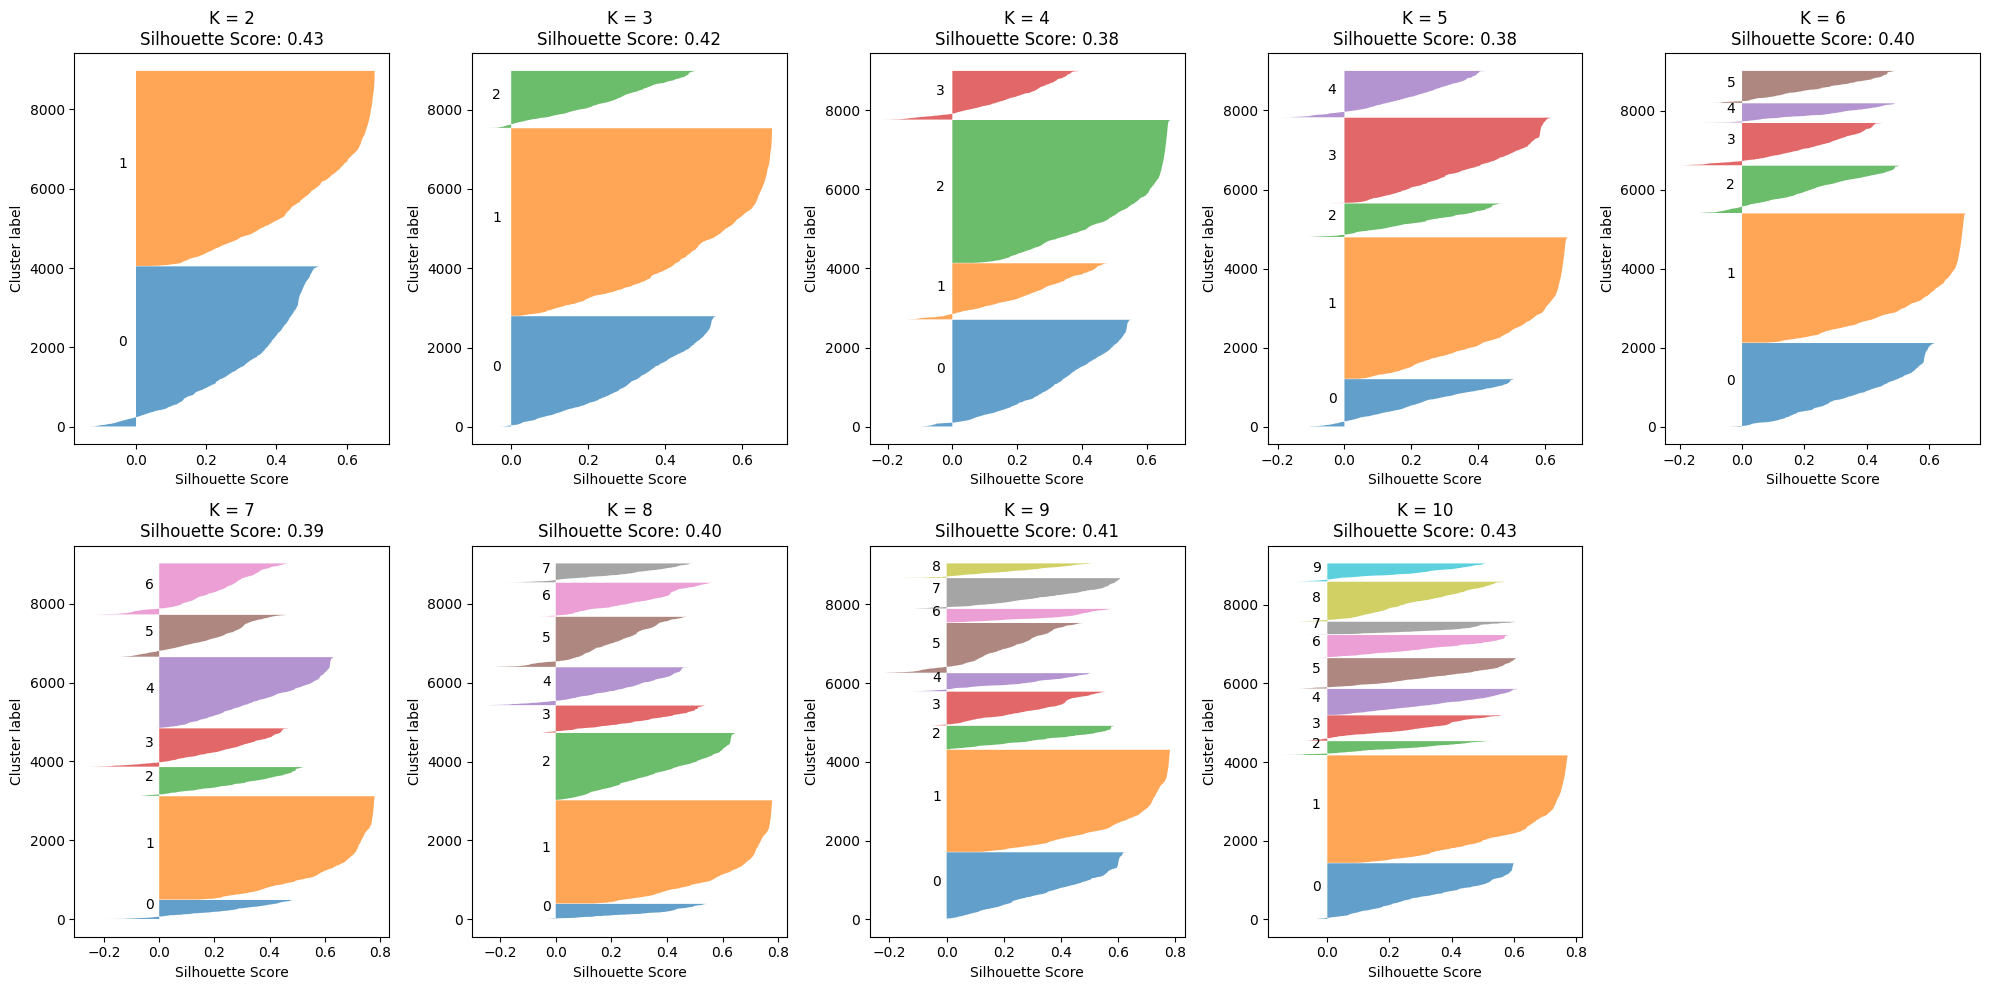


Silhouette Scores DESPUÉS de PCA:
K=2: Silhouette Score = 0.4283
K=3: Silhouette Score = 0.4161
K=4: Silhouette Score = 0.3782
K=5: Silhouette Score = 0.3834
K=6: Silhouette Score = 0.4029
K=7: Silhouette Score = 0.3885
K=8: Silhouette Score = 0.4014
K=9: Silhouette Score = 0.4132
K=10: Silhouette Score = 0.4269


In [31]:
# Celda 17: Método de la silueta (DESPUÉS de PCA)
from sklearn.metrics import silhouette_score, silhouette_samples

# Inicializar la figura
plt.figure(figsize=(20, 10))

# Calcular y graficar la métrica de silueta para diferentes valores de K
silhouette_scores_after = []
for i, k in enumerate(k_values, start=1):
    # Crear el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)

    # Predecir las etiquetas del clúster
    cluster_labels = kmeans.fit_predict(X_pca)

    # Calcular la métrica de silueta
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores_after.append(silhouette_avg)

    # Graficar la métrica de silueta para este valor de K
    plt.subplot(2, 5, i)
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for j in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f'K = {k}\nSilhouette Score: {silhouette_avg:.2f}')
    plt.xlabel('Silhouette Score')
    plt.ylabel('Cluster label')

plt.tight_layout()
plt.show()

# Mostrar scores
print("\nSilhouette Scores DESPUÉS de PCA:")
for k, score in zip(k_values, silhouette_scores_after):
    print(f"K={k}: Silhouette Score = {score:.4f}")


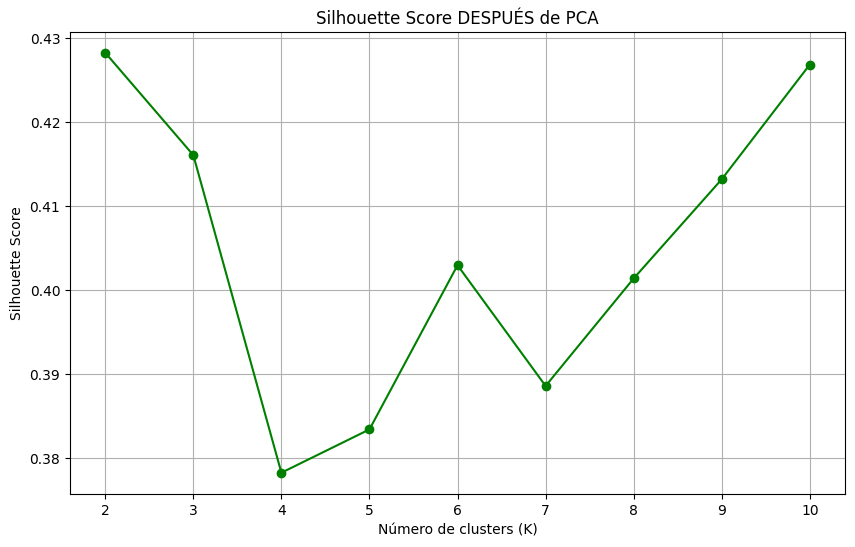


Mejor K según silueta DESPUÉS de PCA: 2
Score: 0.4283


In [32]:
# Celda 18: Gráfico de línea Silhouette (DESPUÉS de PCA)
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores_after, 'go-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score DESPUÉS de PCA')
plt.grid(True)
plt.show()

# Determinar mejor K
best_k_after = k_values[np.argmax(silhouette_scores_after)]
print(f"\nMejor K según silueta DESPUÉS de PCA: {best_k_after}")
print(f"Score: {max(silhouette_scores_after):.4f}")


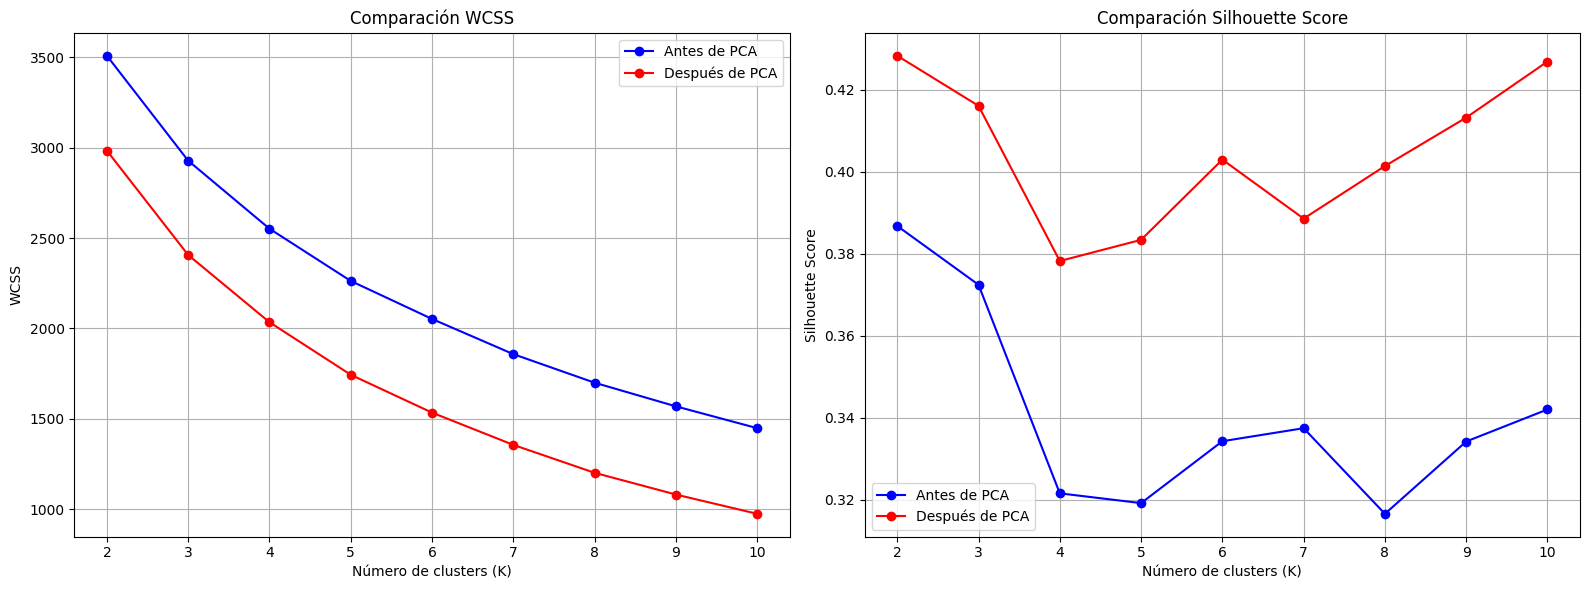

In [33]:
# Celda 19: Comparación ANTES vs DESPUÉS de PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# WCSS
axes[0].plot(k_values, wcss_before, 'b-o', label='Antes de PCA')
axes[0].plot(k_values, wcss_after, 'r-o', label='Después de PCA')
axes[0].set_xlabel('Número de clusters (K)')
axes[0].set_ylabel('WCSS')
axes[0].set_title('Comparación WCSS')
axes[0].legend()
axes[0].grid(True)

# Silhouette
axes[1].plot(k_values, silhouette_scores_before, 'b-o', label='Antes de PCA')
axes[1].plot(k_values, silhouette_scores_after, 'r-o', label='Después de PCA')
axes[1].set_xlabel('Número de clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Comparación Silhouette Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [38]:
# Celda 20: Determinar K óptimo y entrenar modelo
# Basándonos en los métodos del codo y silueta, seleccionamos K=3
optimal_k = 2

kmeans_final = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10,
    max_iter=300
)

clusters = kmeans_final.fit_predict(X_pca)
print(f"K óptimo seleccionado: {optimal_k}")
print(f"\nDistribución de clusters:")
print(pd.Series(clusters).value_counts().sort_index())


K óptimo seleccionado: 2

Distribución de clusters:
0    4035
1    4915
Name: count, dtype: int64


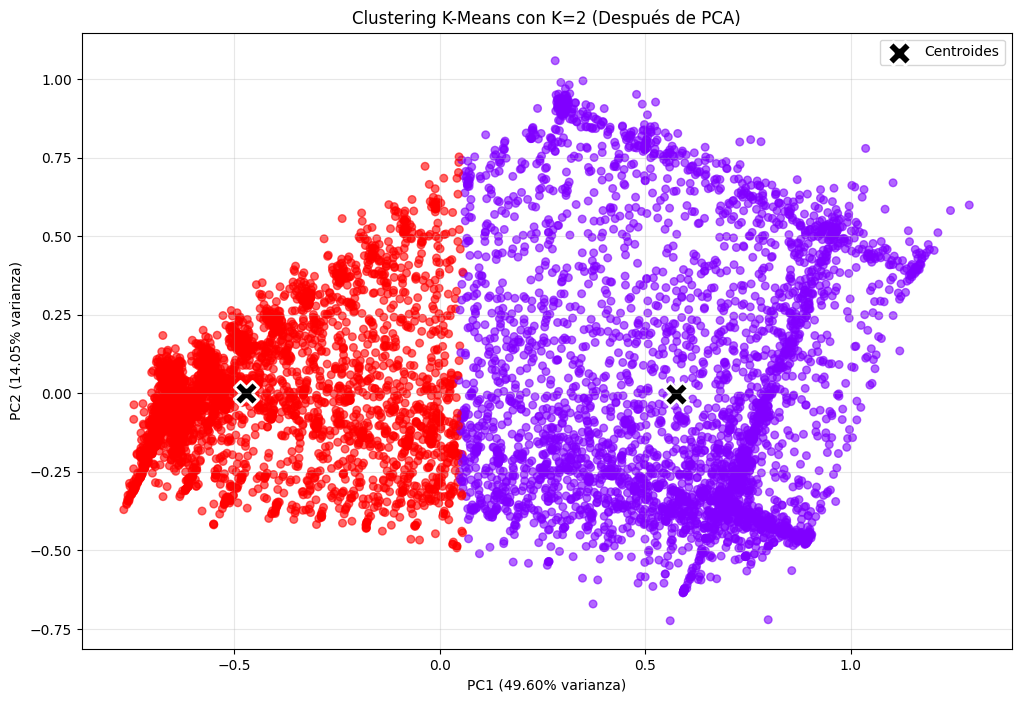

In [39]:
# Celda 21: Visualizar clusters (2D con primeros 2 componentes)
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', alpha=0.6, s=30)

centroids = kmeans_final.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='black',
    marker='X',
    s=300,
    edgecolors='white',
    linewidths=2,
    label='Centroides'
)

plt.xlabel('PC1 (49.60% varianza)')
plt.ylabel('PC2 (14.05% varianza)')
plt.title(f'Clustering K-Means con K={optimal_k} (Después de PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [40]:
# Celda 22: Análisis detallado de cada cluster
# Crear DataFrame con clusters asignados
df_clustered = df_clean.copy()
df_clustered['Cluster'] = clusters

print("="*70)
print("PERFIL DE CADA CLUSTER")
print("="*70)

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]

    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - {len(cluster_data)} clientes ({len(cluster_data)/len(df_clustered)*100:.1f}%)")
    print(f"{'='*70}")

    # Características principales
    print("\nCaracterísticas promedio:")
    print(f"  • BALANCE (saldo): ${cluster_data['BALANCE'].mean():.2f}")
    print(f"  • PURCHASES (compras): ${cluster_data['PURCHASES'].mean():.2f}")
    print(f"  • CREDIT_LIMIT (límite): ${cluster_data['CREDIT_LIMIT'].mean():.2f}")
    print(f"  • CASH_ADVANCE (adelantos): ${cluster_data['CASH_ADVANCE'].mean():.2f}")
    print(f"  • PAYMENTS (pagos): ${cluster_data['PAYMENTS'].mean():.2f}")
    print(f"  • PURCHASES_FREQUENCY (freq. compras): {cluster_data['PURCHASES_FREQUENCY'].mean():.3f}")
    print(f"  • PRC_FULL_PAYMENT (% pago completo): {cluster_data['PRC_FULL_PAYMENT'].mean():.3f}")
    print(f"  • TENURE (antigüedad): {cluster_data['TENURE'].mean():.1f} meses")

PERFIL DE CADA CLUSTER

CLUSTER 0 - 4035 clientes (45.1%)

Características promedio:
  • BALANCE (saldo): $1405.73
  • PURCHASES (compras): $1831.69
  • CREDIT_LIMIT (límite): $4936.91
  • CASH_ADVANCE (adelantos): $566.26
  • PAYMENTS (pagos): $2060.76
  • PURCHASES_FREQUENCY (freq. compras): 0.893
  • PRC_FULL_PAYMENT (% pago completo): 0.254
  • TENURE (antigüedad): 11.6 meses

CLUSTER 1 - 4915 clientes (54.9%)

Características promedio:
  • BALANCE (saldo): $1694.80
  • PURCHASES (compras): $323.06
  • CREDIT_LIMIT (límite): $4130.91
  • CASH_ADVANCE (adelantos): $1317.61
  • PAYMENTS (pagos): $1464.18
  • PURCHASES_FREQUENCY (freq. compras): 0.160
  • PRC_FULL_PAYMENT (% pago completo): 0.071
  • TENURE (antigüedad): 11.4 meses
